In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/My Courses/Python/Projects/Amazon Sale Report.csv')

<ipython-input-4-d0cce88a83b2>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/My Courses/Python/Projects/Amazon Sale Report.csv')


In [1]:
df.head()

NameError: name 'df' is not defined

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
# finding unique values in every column
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [7]:
df['fulfilled-by'].value_counts()

,count
fulfilled-by,
Easy Ship,39277


In [8]:
# dropping columns because of unusable data
df.drop(columns=['index','Unnamed: 22','Style','SKU','ASIN','promotion-ids','fulfilled-by'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Category            128975 non-null  object 
 7   Size                128975 non-null  object 
 8   Courier Status      122103 non-null  object 
 9   Qty                 128975 non-null  int64  
 10  currency            121180 non-null  object 
 11  Amount              121180 non-null  float64
 12  ship-city           128942 non-null  object 
 13  ship-state          128942 non-null  object 
 14  ship-postal-code    128942 non-null  float64
 15  ship-country        128942 non-nul

In [10]:
# changing datatype to correct
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-10-6971dab89e72>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [11]:
# finding null values in every column
df.isnull().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,6872
Qty,0


In [12]:
df['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [13]:
# filling null values
df['currency'].fillna('INR',inplace=True)

<ipython-input-13-02020c951d58>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['currency'].fillna('INR',inplace=True)


In [14]:
df['Amount'].median()

605.0

<Axes: ylabel='Amount'>

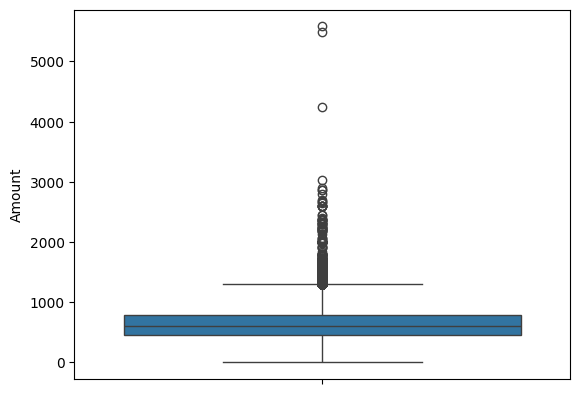

In [15]:
# finding outliers in amount column to fill null values
sns.boxplot(df['Amount'])

In [16]:
df['Amount'].fillna(df['Amount'].mean(),inplace=True)

<ipython-input-16-408bf0bd46f1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].mean(),inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  object        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  object        
 3   Fulfilment          128975 non-null  object        
 4   Sales Channel       128975 non-null  object        
 5   ship-service-level  128975 non-null  object        
 6   Category            128975 non-null  object        
 7   Size                128975 non-null  object        
 8   Courier Status      122103 non-null  object        
 9   Qty                 128975 non-null  int64         
 10  currency            128975 non-null  object        
 11  Amount              128975 non-null  float64       
 12  ship-city           128942 non-null  object        
 13  ship-state          128942 no

In [18]:
df['Amount']=df['Amount'].astype(int)

In [19]:
# drop null values
df.dropna(subset=['ship-city','ship-state','ship-postal-code','ship-country'],inplace=True)

In [20]:
df['ship-postal-code']=df['ship-postal-code'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128942 non-null  object        
 1   Date                128942 non-null  datetime64[ns]
 2   Status              128942 non-null  object        
 3   Fulfilment          128942 non-null  object        
 4   Sales Channel       128942 non-null  object        
 5   ship-service-level  128942 non-null  object        
 6   Category            128942 non-null  object        
 7   Size                128942 non-null  object        
 8   Courier Status      122073 non-null  object        
 9   Qty                 128942 non-null  int64         
 10  currency            128942 non-null  object        
 11  Amount              128942 non-null  int64         
 12  ship-city           128942 non-null  object        
 13  ship-state          128942 non-nul

In [22]:
df['Courier Status'].value_counts()

,count
Courier Status,
Shipped,109461
Unshipped,6679
Cancelled,5933


In [23]:
df['Courier Status'].fillna('Shipped',inplace=True)

<ipython-input-23-9cb7cb47646d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna('Shipped',inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128942 non-null  object        
 1   Date                128942 non-null  datetime64[ns]
 2   Status              128942 non-null  object        
 3   Fulfilment          128942 non-null  object        
 4   Sales Channel       128942 non-null  object        
 5   ship-service-level  128942 non-null  object        
 6   Category            128942 non-null  object        
 7   Size                128942 non-null  object        
 8   Courier Status      128942 non-null  object        
 9   Qty                 128942 non-null  int64         
 10  currency            128942 non-null  object        
 11  Amount              128942 non-null  int64         
 12  ship-city           128942 non-null  object        
 13  ship-state          128942 non-nul

<Axes: xlabel='Status'>

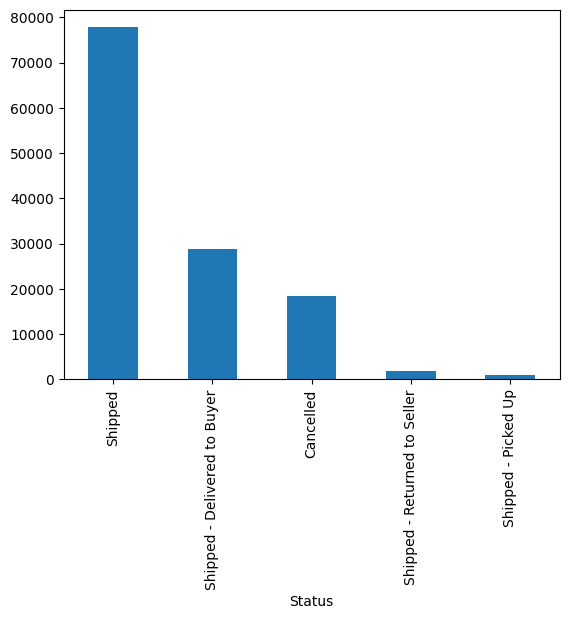

In [25]:
# plotting graph that shows status count of orders
df['Status'].value_counts().head().plot(kind='bar')

<Axes: xlabel='Fulfilment'>

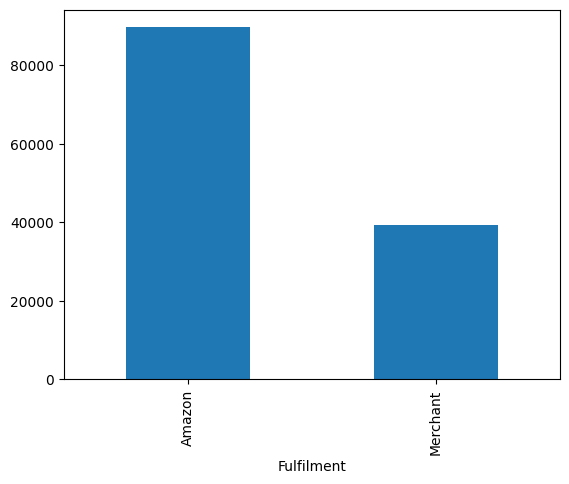

In [26]:
# plotting graph that shows fulfuillment count of orders
df['Fulfilment'].value_counts().plot(kind='bar')

<Axes: xlabel='ship-service-level'>

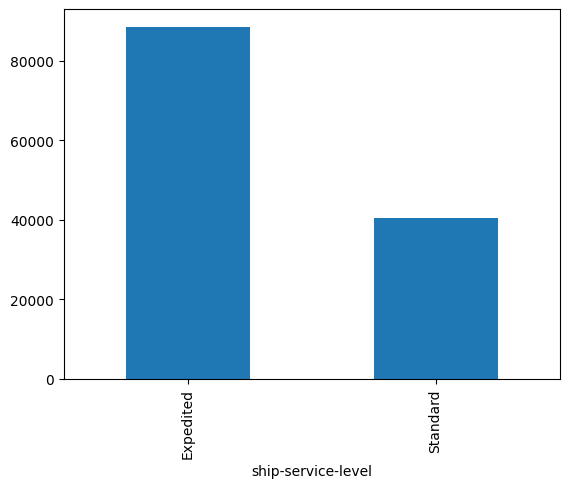

In [27]:
# plotting graph that shows Service-level count of orders
df['ship-service-level'].value_counts().plot(kind='bar')

<Axes: xlabel='Category'>

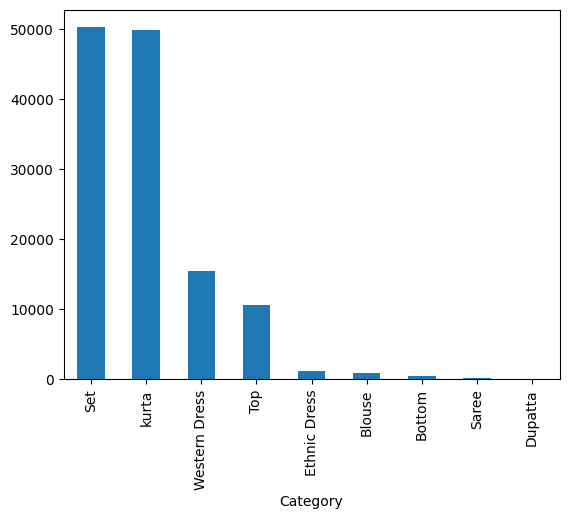

In [28]:
# plotting graph that show which top ordered product
df['Category'].value_counts().plot(kind='bar')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128942 non-null  object        
 1   Date                128942 non-null  datetime64[ns]
 2   Status              128942 non-null  object        
 3   Fulfilment          128942 non-null  object        
 4   Sales Channel       128942 non-null  object        
 5   ship-service-level  128942 non-null  object        
 6   Category            128942 non-null  object        
 7   Size                128942 non-null  object        
 8   Courier Status      128942 non-null  object        
 9   Qty                 128942 non-null  int64         
 10  currency            128942 non-null  object        
 11  Amount              128942 non-null  int64         
 12  ship-city           128942 non-null  object        
 13  ship-state          128942 non-nul

In [30]:
cate_sale=df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

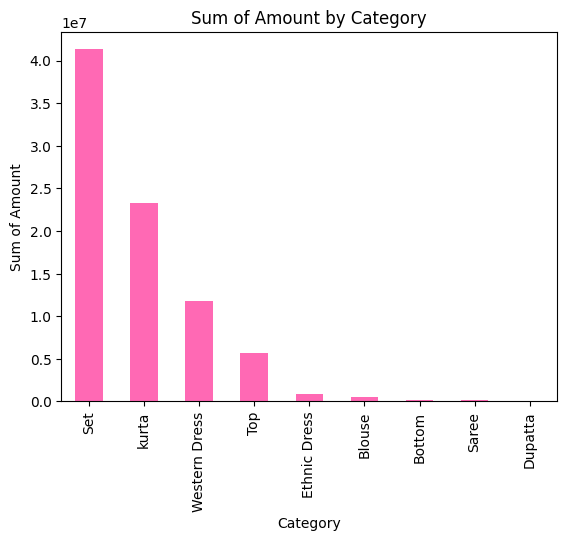

In [31]:
cate_sale.plot(kind='bar', color='hotpink', title='Sum of Amount by Category')
plt.xlabel('Category')
plt.ylabel('Sum of Amount')
plt.show()

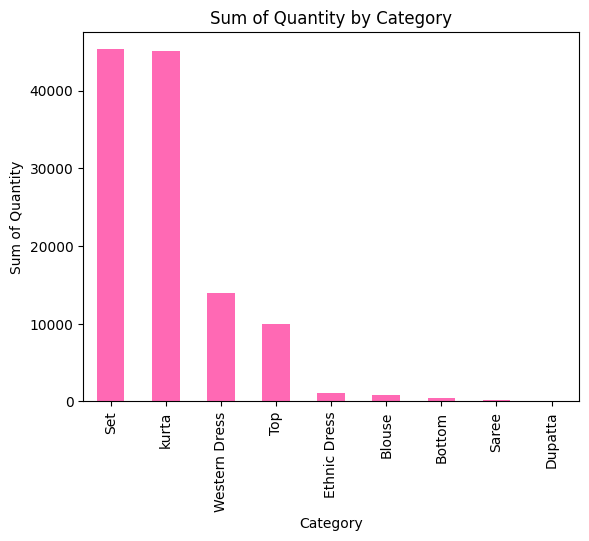

In [32]:
cate_qty=df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)
cate_qty.plot(kind='bar', color='hotpink', title='Sum of Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Sum of Quantity')
plt.show()

In [33]:
size_sale=df.groupby('Size')['Amount'].sum().sort_values(ascending=False)

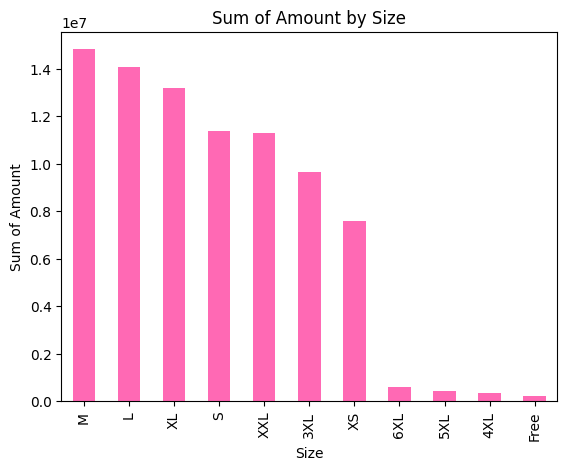

In [34]:
size_sale.plot(kind='bar', color='hotpink', title='Sum of Amount by Size')
plt.xlabel('Size')
plt.ylabel('Sum of Amount')
plt.show()

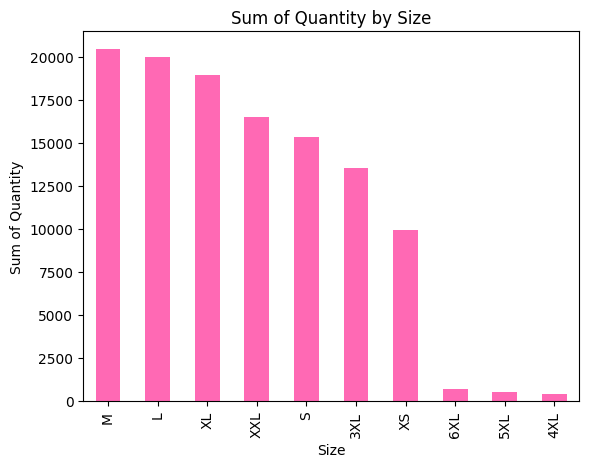

In [35]:
size_qty=df.groupby('Size')['Qty'].sum().sort_values(ascending=False).head(10)
size_qty.plot(kind='bar', color='hotpink', title='Sum of Quantity by Size')
plt.xlabel('Size')
plt.ylabel('Sum of Quantity')
plt.show()

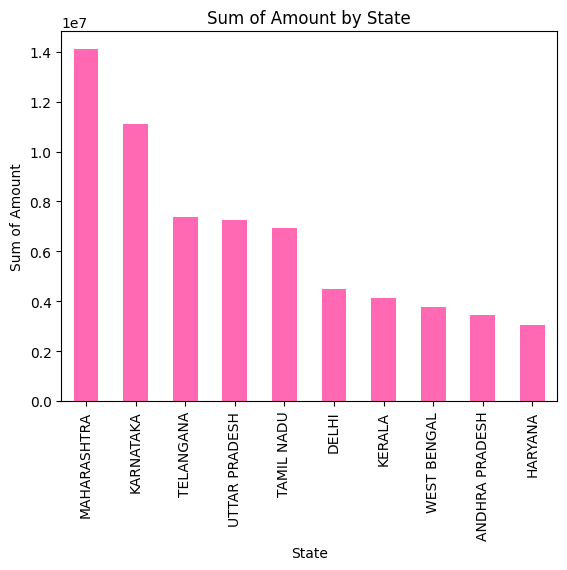

In [36]:
state_sale=df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
state_sale.plot(kind='bar', color='hotpink', title='Sum of Amount by State')
plt.xlabel('State')
plt.ylabel('Sum of Amount')
plt.show()

In [37]:
def plot_graph(col1,col2):
  grouped=df.groupby(col1)[col2].sum().sort_values(ascending=False).head(10)
  grouped.plot(kind='bar', color='hotpink', title=f'Sum of {col2} by {col1}')
  plt.xlabel(col1)
  plt.ylabel(f'Sum of {col2}')


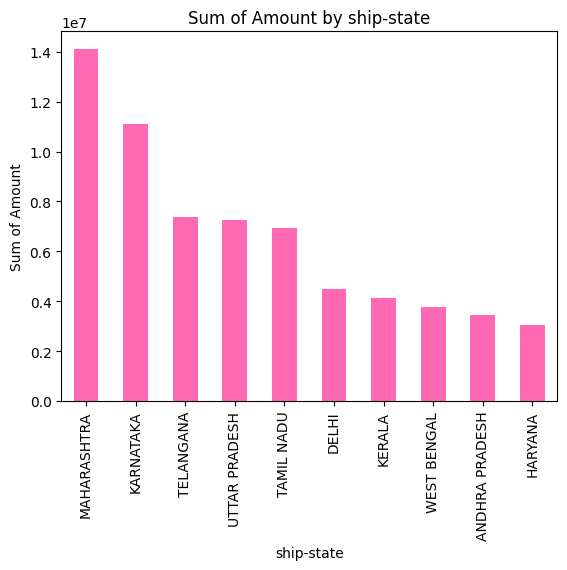

In [38]:
plot_graph('ship-state','Amount')

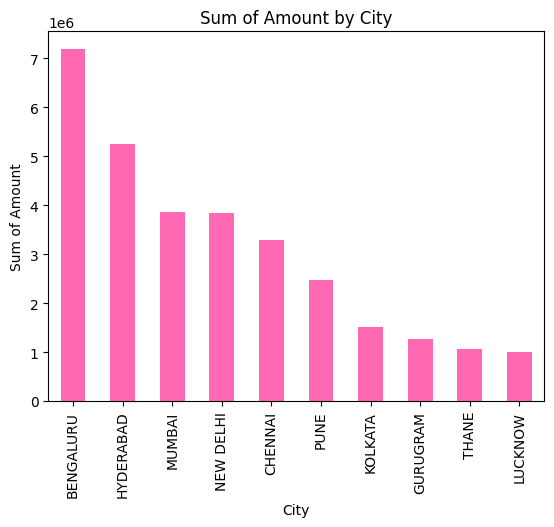

In [39]:
city_sale=df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
city_sale.plot(kind='bar', color='hotpink', title='Sum of Amount by City')
plt.xlabel('City')
plt.ylabel('Sum of Amount')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128942 non-null  object        
 1   Date                128942 non-null  datetime64[ns]
 2   Status              128942 non-null  object        
 3   Fulfilment          128942 non-null  object        
 4   Sales Channel       128942 non-null  object        
 5   ship-service-level  128942 non-null  object        
 6   Category            128942 non-null  object        
 7   Size                128942 non-null  object        
 8   Courier Status      128942 non-null  object        
 9   Qty                 128942 non-null  int64         
 10  currency            128942 non-null  object        
 11  Amount              128942 non-null  int64         
 12  ship-city           128942 non-null  object        
 13  ship-state          128942 non-nul

<Axes: ylabel='Qty'>

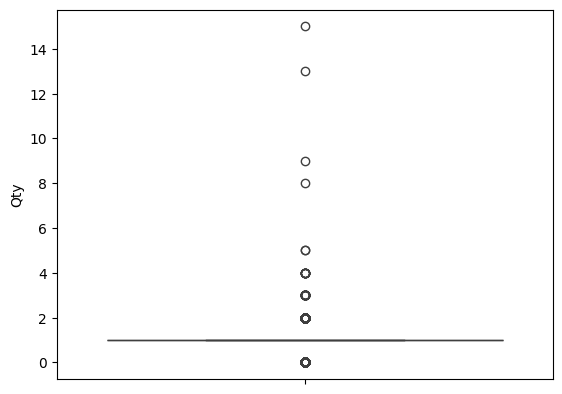

In [41]:
sns.boxplot(df['Qty'])

In [42]:
df['Qty'].value_counts()

,count
Qty,
1,115752
0,12802
2,341
3,32
4,9
5,2
15,1
9,1
13,1


In [43]:
df['Month']=df['Date'].dt.month

In [44]:
df.groupby(df['Month'])['Amount'].sum()

,Amount
Month,
3,107512
4,30773547
5,27840953
6,24899438


In [45]:
df.groupby(df['Month'])['Qty'].sum()

,Qty
Month,
3,156
4,44196
5,38000
6,34269


In [46]:
df['Category_Rank'] = df.groupby(['ship-city', 'Category'])['Qty'].rank(method='first', ascending=False)
df_top_categories = df[df['Category_Rank'] <= 2]

In [47]:
df_top_categories['Size_Rank'] = df_top_categories.groupby(['ship-city', 'Category', 'Size'])['Qty'].rank(method='first', ascending=False)
df_final = df_top_categories[df_top_categories['Size_Rank'] <= 2]

<ipython-input-47-8de65739d5b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories['Size_Rank'] = df_top_categories.groupby(['ship-city', 'Category', 'Size'])['Qty'].rank(method='first', ascending=False)


In [48]:
df_final[['ship-city','Category','Size','Qty']]

,ship-city,Category,Size,Qty
4,CHENNAI,Top,3XL,1
5,GHAZIABAD,Set,XL,1
6,CHANDIGARH,Set,L,1
11,NOIDA,kurta,XS,1
12,Amravati.,kurta,XS,1
...,...,...,...,...
128952,Rishra Hooghly,kurta,M,1
128961,Junagadh,Western Dress,XL,1
128965,Prayagraj (ALLAHABAD),Top,3XL,1
128966,CHENNAI 600042,Set,XS,1


In [49]:
df.groupby(['ship-city','Category','Size'])['Qty'].sum().sort_values(ascending=False).head(25)

ship-city  Category  Size
BENGALURU  kurta     XL      765
                     L       700
           Set       M       696
           kurta     M       677
           Set       L       650
           kurta     XXL     597
           Set       XL      593
HYDERABAD  kurta     L       566
                     XL      553
BENGALURU  Set       S       540
HYDERABAD  kurta     M       505
                     XXL     495
BENGALURU  kurta     3XL     480
           Set       XXL     454
                     3XL     451
HYDERABAD  Set       M       447
CHENNAI    kurta     L       429
                     XL      429
                     XXL     422
NEW DELHI  Set       M       421
HYDERABAD  Set       L       405
BENGALURU  kurta     S       403
NEW DELHI  Set       L       381
CHENNAI    kurta     M       380
HYDERABAD  kurta     3XL     378
Name: Qty, dtype: int64